In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [3]:
data = "healthcare-dataset-stroke-data.csv"
dataframe = pd.read_csv(data)
dataframe.sort_values(by=['stroke'], ascending=False).head(100)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
171,60739,Female,79.0,1,1,No,Self-employed,Rural,60.94,NaN,never smoked,1
158,66258,Female,71.0,0,0,Yes,Self-employed,Urban,195.71,34.1,formerly smoked,1
159,34567,Female,81.0,1,0,Yes,Self-employed,Rural,74.02,25.0,never smoked,1
160,50931,Female,76.0,0,0,Yes,Private,Urban,57.92,NaN,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
219,31421,Male,73.0,0,1,Yes,Govt_job,Rural,219.73,28.6,never smoked,1
218,25904,Female,76.0,1,1,Yes,Self-employed,Urban,199.86,NaN,smokes,1
190,24905,Female,65.0,0,0,Yes,Private,Urban,205.77,46.0,formerly smoked,1
191,66071,Male,51.0,1,0,Yes,Private,Urban,112.16,42.5,formerly smoked,1


In [4]:
X = dataframe['heart_disease'].values.reshape(-1,1)
y = dataframe['stroke'].values.reshape(-1,1)
print(X.shape, y.shape)

(5110, 1) (5110, 1)


In [5]:
model.fit(X, y)
print(model)

LinearRegression()


In [6]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [[0.12850252]]
y-axis intercept:  [0.04178734]


#### Predictions

In [7]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [1]
Predicted output: [0.17028986]
Prediction Error: [-0.82971014]


In [8]:
#pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})[["Predicted", "Actual", "Error"]]

In [9]:
X_min = X.min()
X_max = X.max()

In [10]:
y_min_actual = y.min()
y_max_actual = y.max()

#### Output from Min / Max

In [11]:
y_min = 0.04178734 + 0.12850252 * X_min
y_max = 0.04178734 + 0.12850252 * X_max
print(f"Actual Min Value: {y_min_actual}")
print(f"Calculated Min Value: {y_min}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Calculated Max Value: {y_max}")

Actual Min Value: 0
Calculated Min Value: 0.04178734
Actual Max Value: 1
Calculated Max Value: 0.17028986000000002


#### Prediction based on Min / Max

In [12]:
y_min_predicted = model.predict([[X_min]])
y_max_predicted = model.predict([[X_max]])
print(f"Actual Min Value: {y_min_actual}")
print(f"Predicted Min Value: {y_min_predicted}")
print(f"Actual Max Value: {y_max_actual}")
print(f"Predicted Max Value: {y_max_predicted}")

Actual Min Value: 0
Predicted Min Value: [[0.04178734]]
Actual Max Value: 1
Predicted Max Value: [[0.17028986]]


#### Model Fit Illustration

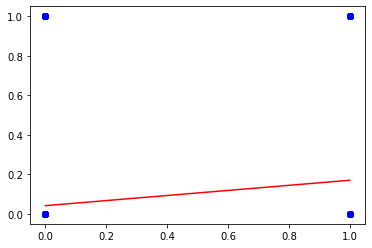

In [13]:
plt.scatter(X, y, c='blue')
plt.plot([X_min, X_max], [y_min, y_max], c='red')